# US Flights of 2020 Jan

## by Mani Sai Prasad

## Preliminary Wrangling

> This document explores a dataset containing flights in the United States, including carriers, arrival and departure delays in 2020. https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=                                 
The report will gather & analyze flights of 2020 Jan which is (607346) observations by resolve the following questions:-
* what is the rate of delayed and cancelled flighes?
* what are the best airlines in terms of delayed and cancelled flighes?
* what are the best flights in terms of delayed and cancelled flighes?

In [42]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [77]:
df = pd.read_csv('./62598021_T_ONTIME_REPORTING.csv')
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 44
0,2020,1,1,3,WN,N951WN,5888,13891,1389101,32575,...,122.0,74.0,1.0,363.0,8.0,0.0,27.0,0.0,33.0,NaN
1,2020,1,1,3,WN,N467WN,6276,13891,1389101,32575,...,92.0,71.0,1.0,363.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,3,WN,N7885A,4598,13891,1389101,32575,...,68.0,57.0,1.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,3,WN,N551WN,4761,13891,1389101,32575,...,75.0,63.0,1.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,3,WN,N968WN,5162,13891,1389101,32575,...,67.0,57.0,1.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df.shape

(607346, 45)

In [79]:
df.dtypes

YEAR                       int64
MONTH                      int64
DAY_OF_MONTH               int64
DAY_OF_WEEK                int64
OP_UNIQUE_CARRIER         object
TAIL_NUM                  object
OP_CARRIER_FL_NUM          int64
ORIGIN_AIRPORT_ID          int64
ORIGIN_AIRPORT_SEQ_ID      int64
ORIGIN_CITY_MARKET_ID      int64
ORIGIN                    object
ORIGIN_STATE_ABR          object
ORIGIN_STATE_FIPS          int64
ORIGIN_STATE_NM           object
DEST_AIRPORT_ID            int64
DEST_AIRPORT_SEQ_ID        int64
DEST_CITY_MARKET_ID        int64
DEST                      object
DEST_STATE_ABR            object
DEST_STATE_FIPS            int64
DEST_STATE_NM             object
CRS_DEP_TIME               int64
DEP_TIME                 float64
DEP_DELAY                float64
DEP_DELAY_NEW            float64
TAXI_OUT                 float64
TAXI_IN                  float64
CRS_ARR_TIME               int64
ARR_TIME                 float64
ARR_DELAY                float64
ARR_DELAY_

In [80]:
df.head(10)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 44
0,2020,1,1,3,WN,N951WN,5888,13891,1389101,32575,...,122.0,74.0,1.0,363.0,8.0,0.0,27.0,0.0,33.0,NaN
1,2020,1,1,3,WN,N467WN,6276,13891,1389101,32575,...,92.0,71.0,1.0,363.0,NaN,NaN,NaN,NaN,NaN,NaN
2,2020,1,1,3,WN,N7885A,4598,13891,1389101,32575,...,68.0,57.0,1.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2020,1,1,3,WN,N551WN,4761,13891,1389101,32575,...,75.0,63.0,1.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
4,2020,1,1,3,WN,N968WN,5162,13891,1389101,32575,...,67.0,57.0,1.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
5,2020,1,1,3,WN,N7856A,5684,13891,1389101,32575,...,80.0,57.0,1.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
6,2020,1,1,3,WN,N7735A,6152,13891,1389101,32575,...,72.0,62.0,1.0,333.0,NaN,NaN,NaN,NaN,NaN,NaN
7,2020,1,1,3,WN,N405WN,1679,13891,1389101,32575,...,73.0,66.0,1.0,390.0,0.0,0.0,0.0,7.0,40.0,NaN
8,2020,1,1,3,WN,N489WN,3479,13891,1389101,32575,...,100.0,73.0,1.0,390.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2020,1,1,3,WN,N7708E,4069,13891,1389101,32575,...,84.0,71.0,1.0,390.0,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# correcting dates formate
df['DEP_TIME'] = df.DEP_TIME.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['CRS_DEP_TIME'] = df.CRS_DEP_TIME.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['ARR_TIME'] = df.ARR_TIME.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)
df['CRS_ARR_TIME'] = df.CRS_ARR_TIME.apply(lambda x: str(int(x)).zfill(4) if pd.notnull(x) else x)

# creating AM/PM in df
def setPM(x):
    if((x>=12) & (x<= 23)):
        return 'PM'
    elif((x>=0) & (x<= 11) | (x==24)):
        return 'AM'
    else:
        return x
    
df.DEP_TIME.dropna(inplace=True)
df['DepTimePM'] = df.DEP_TIME.str[:2].astype('int64')
df['DepTimePM'] = df.DepTimePM.apply(setPM)
df.DepTimePM.dropna(inplace=True)

In [82]:
df.describe()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN_STATE_FIPS,DEST_AIRPORT_ID,...,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Unnamed: 44
count,607346.0,607346.0,607346.000000,607346.000000,607346.000000,607346.000000,6.073460e+05,607346.000000,607346.000000,607346.000000,...,599268.000000,599268.000000,607346.0,607346.000000,82285.000000,82285.000000,82285.000000,82285.000000,82285.000000,0.0
mean,2020.0,1.0,16.014354,3.955735,2622.365261,12657.389167,1.265743e+06,31761.273269,26.876029,12657.196320,...,137.039345,112.187437,1.0,798.022341,24.696324,4.594944,14.262733,0.091062,20.561658,NaN
std,0.0,0.0,8.990719,1.910205,1822.545302,1524.407203,1.524405e+05,1308.052641,16.560267,1524.279269,...,72.293510,70.629553,0.0,587.282639,72.972359,39.180258,33.736783,2.308003,50.370818,NaN
min,2020.0,1.0,1.000000,1.000000,1.000000,10135.000000,1.013506e+06,30070.000000,1.000000,10135.000000,...,18.000000,8.000000,1.0,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2020.0,1.0,8.000000,2.000000,1070.000000,11292.000000,1.129202e+06,30713.000000,12.000000,11292.000000,...,84.000000,61.000000,1.0,369.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2020.0,1.0,16.000000,4.000000,2177.000000,12889.000000,1.288903e+06,31453.000000,26.000000,12889.000000,...,120.000000,94.000000,1.0,641.000000,1.000000,0.000000,2.000000,0.000000,0.000000,NaN
75%,2020.0,1.0,24.000000,5.000000,4108.000000,14027.000000,1.402702e+06,32467.000000,42.000000,14027.000000,...,168.000000,142.000000,1.0,1037.000000,22.000000,0.000000,19.000000,0.000000,22.000000,NaN
max,2020.0,1.0,31.000000,7.000000,6860.000000,16869.000000,1.686901e+06,35991.000000,78.000000,16869.000000,...,744.000000,698.000000,1.0,5095.000000,2489.000000,1525.000000,1408.000000,188.000000,2228.000000,NaN


### What is the structure of your dataset?

> There are 607346 flight observations with 45 features in 2020 jan.


### What is/are the main feature(s) of interest in your dataset?

> delayed and canceled flights in terms fo carriers, locations & time.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Arr_Delay, DepDelay, Cancelled, Month, Day_Of_Week, Dep_Time, Arr_Time, OP_UNIQUE_CARRIER, Origin & Dest.

## Univariate Exploration

> I'll start by looking at the airlines sizes

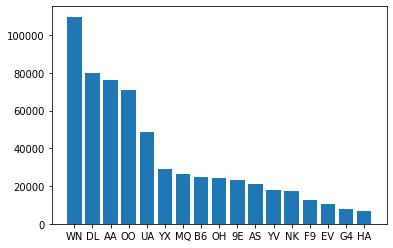

In [83]:
airlines = df.OP_UNIQUE_CARRIER.value_counts()
plt.bar(airlines.index, airlines);

> Flight quantity is different among airlines.

### Flights size in each state

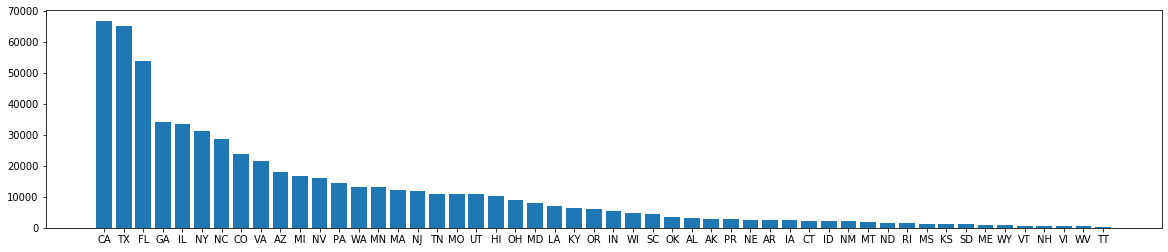

In [98]:
plt.figure(figsize=[20,4])
states = df.ORIGIN_STATE_ABR.value_counts()

plt.bar(states.index, states);

> Flight quantity is different among airlines.

### Flights distributed during days of week

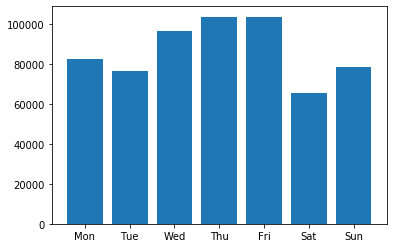

In [99]:
width = 1
bins = np.arange(1, 9, width)
plt.hist(df.DAY_OF_WEEK, rwidth=.8 , bins=bins)
name_days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.xticks(np.arange(1.5,max(bins),width), name_days);

> There are little drop of flights in weekend.



### Rate of cancelled flights

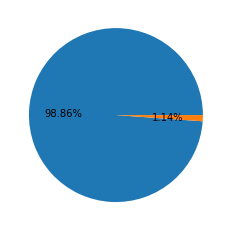

In [100]:
plt.pie(df.CANCELLED.value_counts(), autopct='%.2f%%');

> There are 1.14% flights were cancelled.



### Distribution of departure delay

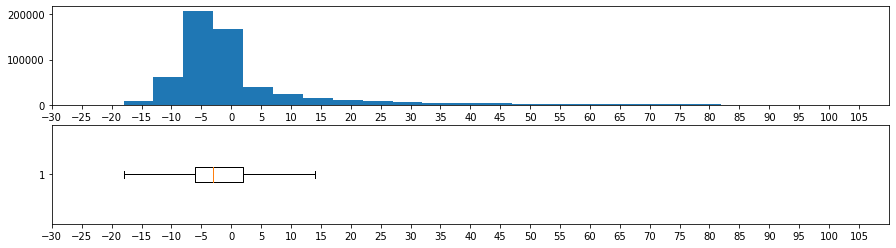

In [101]:

plt.figure(figsize=[15,4])

plt.subplot(2,1,1)
step = 5
x_min, x_max = -30, 110
bin_edges = np.arange(df.DEP_DELAY.min()-step, df.DEP_DELAY.max()+step, step)
plt.hist(df.DEP_DELAY, bins=bin_edges)
plt.xlim(x_min,x_max)
plt.xticks(np.arange(x_min, x_max, step))


plt.subplot(2,1,2)
plt.boxplot(x=df[pd.notnull(df.DEP_DELAY)].DEP_DELAY, vert=False, showfliers=False)
plt.xlim(x_min,x_max)
plt.xticks(np.arange(x_min, x_max, step));

> There are delayed departures as well as earlier departures and the most of them are between -25 to 25 min differ of the scheduled time. However, there is a flight has been delayed more than 1 day and 17 hours, and also there is a flight had be earlier around 9 hours of the schedule time.

### Distribution of arrival delay

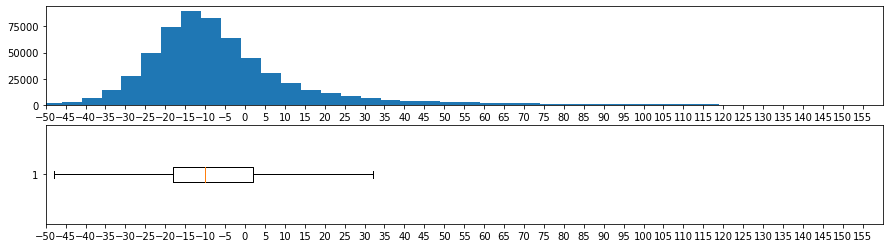

In [102]:
plt.figure(figsize=[15,4])
plt.subplot(2,1,1)
step = 5
x_min, x_max = -50, 160
bin_edges = np.arange(df.ARR_DELAY.min()-step, df.ARR_DELAY.max()+step, step)
plt.hist(df.ARR_DELAY, bins=bin_edges)
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, step))

plt.subplot(2,1,2)
plt.boxplot(x=df[pd.notnull(df.ARR_DELAY)].ARR_DELAY, vert=False, showfliers=False)
plt.xlim(x_min, x_max)
plt.xticks(np.arange(x_min, x_max, step));

> There are delayed arrivals as well as earlier arrivals and the most of them are between -45 to 45 min differ of the scheduled time.



## Bivariate Exploration

> To start off with, I want to look at relationship among Cannelled, DepDelay, ArrDelay & flight quantity of airlines in terms of airlines

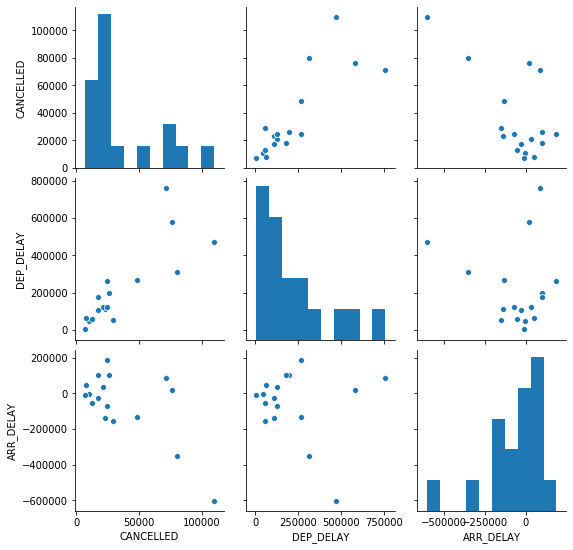

In [103]:
sample = df.groupby('OP_UNIQUE_CARRIER')
sample = pd.merge(
    pd.DataFrame(sample.CANCELLED.count()), 
    pd.DataFrame(sample.DEP_DELAY.sum()), 
    on='OP_UNIQUE_CARRIER'
).merge(
    pd.DataFrame(sample.ARR_DELAY.sum()), on='OP_UNIQUE_CARRIER'
)

sb.pairplot(sample);


> There are positive correlation coefficients among Cannelled, DepDelay, ArrDelay & flight quantity of airlines.

### Relationship among Cannelled, DepDelay, ArrDelay & flight quantity of airlines in terms of states

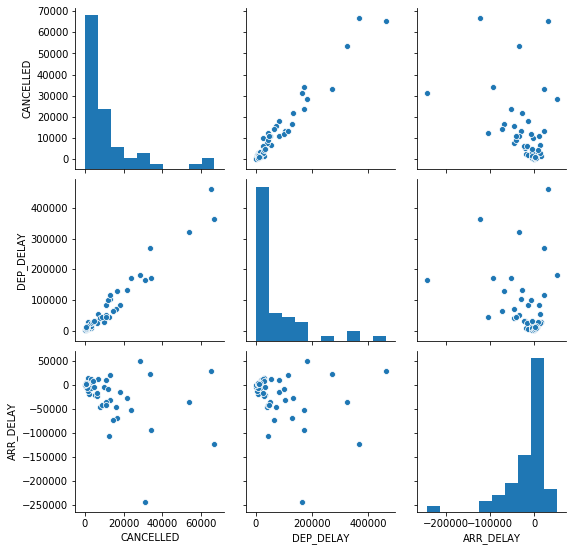

In [105]:
sample = df.groupby('ORIGIN_STATE_ABR')
sample = pd.merge(
    pd.DataFrame(sample.CANCELLED.count()), 
    pd.DataFrame(sample.DEP_DELAY.sum()), 
    on='ORIGIN_STATE_ABR'
).merge(
    pd.DataFrame(sample.ARR_DELAY.sum()), on='ORIGIN_STATE_ABR'
)


sb.pairplot(sample);

There are positive correlation coefficients among Cannelled, DepDelay, ArrDelay & flight quantity of states.



### Relationship between states & airlines

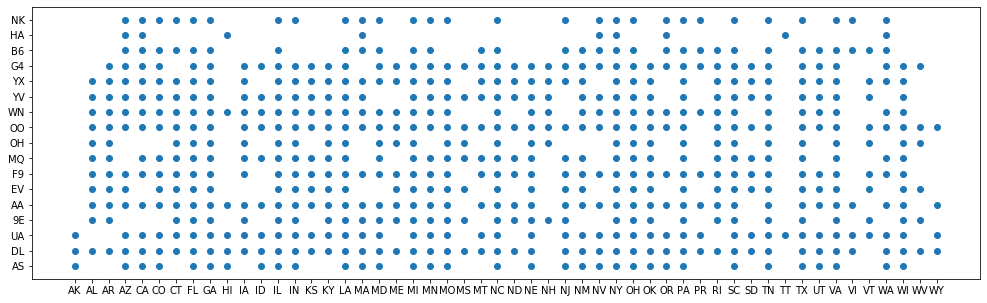

In [108]:
state_airlines = df.groupby(['ORIGIN_STATE_ABR', 'OP_UNIQUE_CARRIER'], as_index=False).count()
state_airlines = state_airlines[['ORIGIN_STATE_ABR', 'OP_UNIQUE_CARRIER']]

plt.figure(figsize=[17,5])
plt.scatter(state_airlines.ORIGIN_STATE_ABR, state_airlines.OP_UNIQUE_CARRIER);

> The most of airlines reach the most of states.



### Cancelled flights for each airline

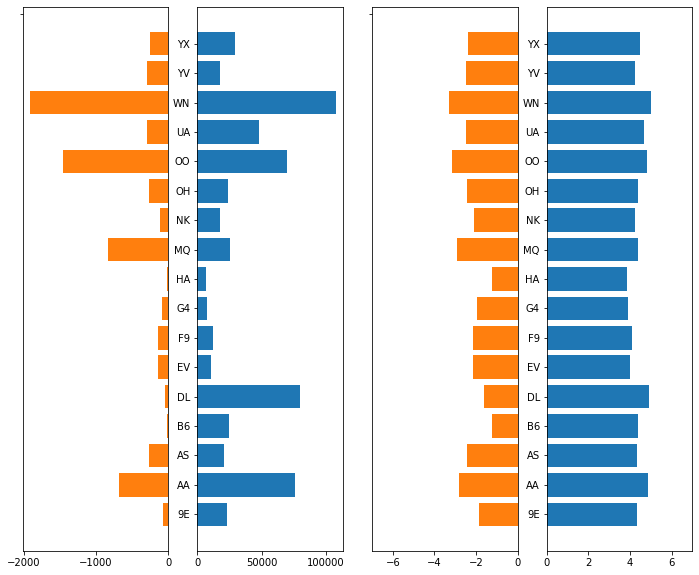

In [113]:
carriers = df.groupby(['OP_UNIQUE_CARRIER','CANCELLED'], as_index=False).count()
carriers = carriers.pivot_table('YEAR', 'OP_UNIQUE_CARRIER', 'CANCELLED', fill_value=0)
carriers.rename(columns={0:'cxl_0', 1:'cxl_1'}, inplace=True)

plt.figure(figsize=[12,10])
carriers
plt.subplot(1,4,2)
plt.barh(carriers.index, carriers.cxl_0, color='C0')


plt.subplot(1,4,1)
plt.barh(carriers.index, carriers.cxl_1*-1, color='C1')
plt.yticks(' ')


carriers.cxl_0 = np.log10(carriers.cxl_0)
carriers.cxl_1 = np.log10(carriers.cxl_1)

plt.subplot(1,4,4)
plt.barh(carriers.index, carriers.cxl_0, color='C0')
plt.xlim(0, 7)


plt.subplot(1,4,3)
plt.barh(carriers.index, carriers.cxl_1*-1, color='C1')
plt.xlim(-7, 0)
plt.yticks(' ');

>Normalizing data by log10 make it more informative.



## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Delay and cancelation factors with airlines and their size.

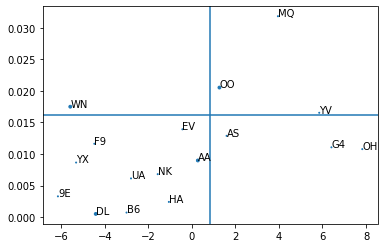

In [127]:
airlines_mean = df.groupby('OP_UNIQUE_CARRIER', as_index=False).mean()
airlines_count = df.groupby('OP_UNIQUE_CARRIER', as_index=False).count()

airlines = airlines_mean[['OP_UNIQUE_CARRIER','ARR_DELAY','CANCELLED']].merge(
    airlines_count[['OP_UNIQUE_CARRIER','FLIGHTS']], on='OP_UNIQUE_CARRIER'
)
airlines.rename(columns={'FLIGHTS':'Count'}, inplace=True)

airlines['Size'] = airlines.Count.map(lambda x: round(x/120000)+1)
airlines['Size'] = airlines.Size.map(lambda x: 7 if x>7 else x)

plt.scatter(airlines.ARR_DELAY, airlines.CANCELLED, s=airlines.Size**3)

x_max = max(airlines.ARR_DELAY)
x_min = min(airlines.ARR_DELAY)

y_max = max(airlines.CANCELLED)
y_min = min(airlines.CANCELLED)

x_len =  x_max - x_min
y_len =  y_max - y_min

x = x_len*.05
y = y_len*.05

plt.xlim(x_min-x, x_max+x)
plt.ylim(y_min-y, y_max+y)
plt.axhline(y=y_max-(y_len/2))
plt.axvline(x_max - (x_len/2))

for i, txt in enumerate(airlines.OP_UNIQUE_CARRIER):
    plt.annotate(txt, (airlines.ARR_DELAY[i], airlines.CANCELLED[i]));

> delay factor is impact on the most airlines while cancellation is impact on around all of them.

### Delay and cancelation factors with states and flights size

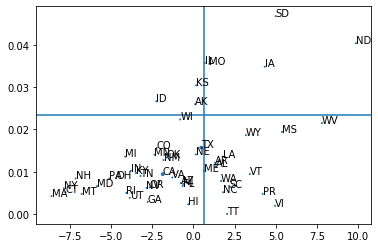

In [130]:
state_mean = df.groupby('ORIGIN_STATE_ABR', as_index=False).mean()
state_count = df.groupby('ORIGIN_STATE_ABR', as_index=False).count()

states = state_mean[['ORIGIN_STATE_ABR','ARR_DELAY','CANCELLED']].merge(
    state_count[['ORIGIN_STATE_ABR','FLIGHTS']], on='ORIGIN_STATE_ABR'
)
states.rename(columns={'FLIGHTS':'Count'}, inplace=True)

states['Size'] = states.Count.map(lambda x: round(x/120000)+1)
states['Size'] = states.Size.map(lambda x: 7 if x>7 else x)

plt.scatter(states.ARR_DELAY, states.CANCELLED, s=states.Size**3)

x_max = max(states.ARR_DELAY)
x_min = min(states.ARR_DELAY)

y_max = max(states.CANCELLED)
y_min = min(states.CANCELLED)

x_len =  x_max - x_min
y_len =  y_max - y_min

x = x_len*.05
y = y_len*.05

plt.xlim(x_min-x, x_max+x)
plt.ylim(y_min-y, y_max+y)
plt.axhline(y=y_max-(y_len/2))
plt.axvline(x_max - (x_len/2))

for i, txt in enumerate(states.ORIGIN_STATE_ABR):
    plt.annotate(txt, (states.ARR_DELAY[i], states.CANCELLED[i]));

> There is variation among states in terms of delayed and cancelled flightes and also the quantity of flights.



### Delay and cancellation factors with flights in terms of time (AM/PM)

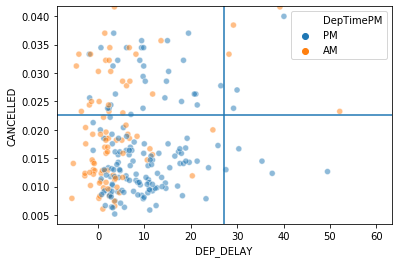

In [137]:
flights_mean = df.groupby(['OP_CARRIER_FL_NUM','DepTimePM'], as_index=False).mean()
flights_count = df.groupby('OP_CARRIER_FL_NUM', as_index=False).count()

flights = flights_mean[['OP_CARRIER_FL_NUM','DepTimePM', 'DEP_DELAY','CANCELLED']].merge(
    flights_count[['OP_CARRIER_FL_NUM','FLIGHTS']], on='OP_CARRIER_FL_NUM'
)
flights.rename(columns={'FLIGHTS':'Count'}, inplace=True)

Q1 = flights.quantile(.25)
Q3 = flights.quantile(.75)
IQ = Q3-Q1
Q_max = Q3+IQ*1.5
Q_min = Q1-IQ*1.5

flights_filtered = flights[(flights.DEP_DELAY > Q_min.DEP_DELAY) & (flights.DEP_DELAY < Q_max.DEP_DELAY)]

flights_filtered = flights_filtered[
    (flights_filtered.Count > Q_min.Count) & (flights_filtered.Count < Q_max.Count)
]

flights_no_cxl = flights_filtered[flights_filtered.CANCELLED == 0]
flights_filtered = flights_filtered[flights_filtered.CANCELLED > 0]

flights_filtered.reset_index(inplace=True)

flights_filtered = flights[flights.CANCELLED > 0]

sb.scatterplot(flights_filtered.DEP_DELAY, flights_filtered.CANCELLED, alpha=.5, hue=flights_filtered.DepTimePM)

# x_max = max(flights_filtered.DepDelay)
x_max = 60
x_min = min(flights_filtered.DEP_DELAY)

# y_max = max(flights_filtered.Cancelled)
y_max = .04
y_min = min(flights_filtered.CANCELLED)

x_len =  x_max - x_min
y_len =  y_max - y_min

x = x_len*.05
y = y_len*.05

plt.xlim(x_min-x, x_max+x)
plt.ylim(y_min-y, y_max+y)
plt.axhline(y=y_max-(y_len/2))
plt.axvline(x=x_max - (x_len/2));

>Cancelled flights are in AM flights, while PM flights have more delayed flights.



> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!